In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_data = pd.read_csv("/content/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data.shape

(891, 12)

In [8]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
test_data = pd.read_csv("/content/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
test_data.shape

(418, 11)

In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [12]:
train_data.groupby('Survived').mean()

<ipython-input-12-dc293133169e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train_data.groupby('Survived').mean()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [14]:
male_ind = len(train_data[train_data['Sex'] == 'male'])
print('No of Male in Ship :', male_ind)

No of Male in Ship : 577


In [15]:
female_ind = len(train_data[train_data['Sex'] == 'female'])
print('No of Female in Ship :', female_ind)

No of Female in Ship : 314


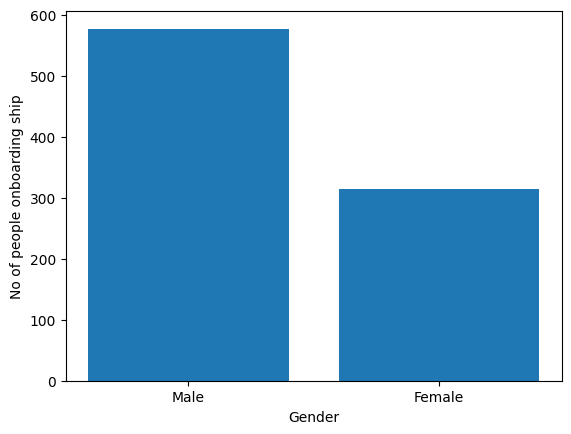

In [31]:
genders = ['Male', 'Female']
count = [577, 314]
numeric_genders = [0, 1]
fig, ax = plt.subplots()
ax.bar(numeric_genders, count, tick_label=genders)
ax.set_xlabel("Gender")
ax.set_ylabel("No of people onboarding ship")
plt.show()


In [17]:
alive = len(train_data[train_data['Survived'] == 1])
dead = len(train_data[train_data['Survived'] == 0])

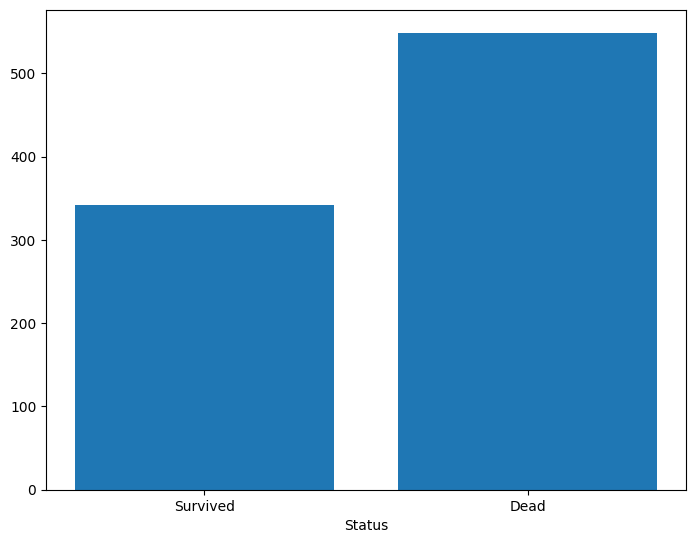

In [18]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
status = ['Survived', 'Dead']
ind = [alive, dead]
ax.bar(status, ind)
plt.xlabel('Status')
plt.show()

Text(0.5, 1.0, "Bar graph of people accrding to ticket class in which people couldn't survive")

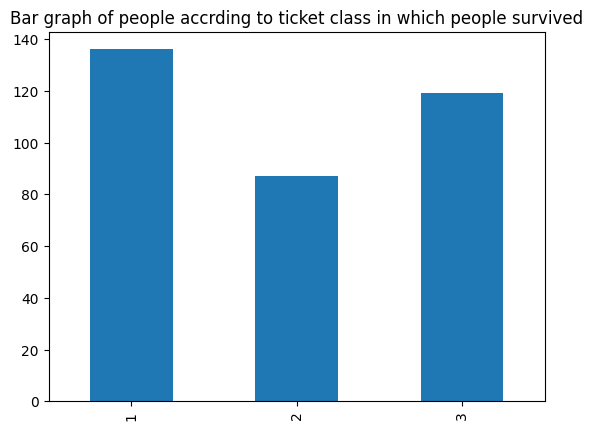

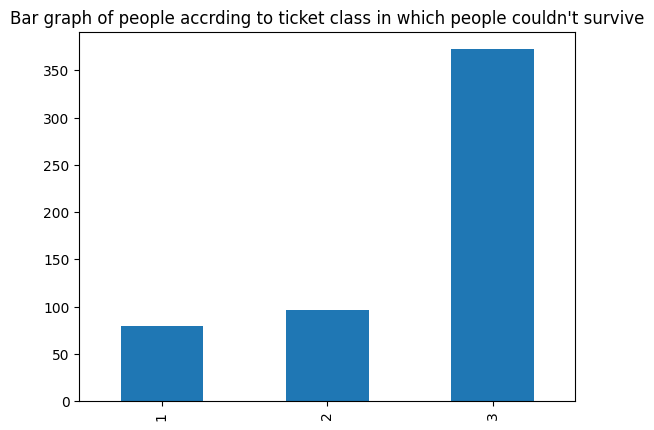

In [20]:
plt.figure(1)
train_data.loc[train_data['Survived'] == 1, 'Pclass'].value_counts().sort_index().plot.bar()
plt.title('Bar graph of people accrding to ticket class in which people survived')


plt.figure(2)
train_data.loc[train_data['Survived'] == 0, 'Pclass'].value_counts().sort_index().plot.bar()
plt.title('Bar graph of people accrding to ticket class in which people couldn\'t survive')

In [23]:
#Droping Useless Columns
train = train_data.drop(['Ticket'], axis = 1)
test = test_data.drop(['Ticket'], axis = 1)


In [24]:
train = train_data.drop(['Cabin'], axis = 1)
test = test_data.drop(['Cabin'], axis = 1)


In [25]:
train = train_data.drop(['Name'], axis = 1)
test = test_data.drop(['Name'], axis = 1)

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

In [64]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
